In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('drive/MyDrive/creditcard.csv')
df.shape

(284807, 31)

shuffle

In [4]:
df = df.sample(frac=1)
df.shape

(284807, 31)

In [4]:
df_1 = df.sample(frac=0.1)
df_1.shape

(28481, 31)

scale time and amount

In [5]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

In [6]:
df['Amount'] = rs.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = rs.fit_transform(df['Time'].values.reshape(-1,1))

down-sampling

In [65]:
fraud = df.loc[df['Class']==1]
non_fraud = df.loc[df['Class']==0]
non_fraud = non_fraud[:fraud.shape[0]]
non_fraud.shape

(492, 31)

In [66]:
down_df = pd.concat([fraud, non_fraud])
down_df = down_df.sample(frac=1)

In [17]:
corr = df.corr()


remove extreme outlier

In [67]:
import numpy as np
def cut_off(down_df, cname):
  c_fraud = down_df[cname].loc[down_df['Class']==1].values
  q25,q75 = np.percentile(c_fraud, 25), np.percentile(c_fraud, 75)
  threshold = (q75-q25)*1.5
  c_lower_bound = q25 - threshold
  c_upper_bound = q75 + threshold
  return c_lower_bound, c_upper_bound


In [68]:
v14_lower_bound, v14_upper_bound = cut_off(down_df, 'V14')
v12_lower_bound, v12_upper_bound = cut_off(down_df, 'V12')
v10_lower_bound, v10_upper_bound = cut_off(down_df, 'V10')
print('V10 lower=',v10_lower_bound, 'upper=', v10_upper_bound)
print('V12 lower=',v12_lower_bound, 'upper=', v12_upper_bound)
print('V14 lower=',v14_lower_bound, 'upper=', v14_upper_bound)

V10 lower= -15.47046969983434 upper= 5.099587558797303
V12 lower= -17.25930926645337 upper= 5.597044719256134
V14 lower= -17.807576138200663 upper= 3.8320323237414122


In [69]:
down_df = down_df.drop(down_df[(down_df['V14']>v14_upper_bound) | (down_df['V14']<v14_lower_bound)].index)
down_df = down_df.drop(down_df[(down_df['V10']>v10_upper_bound) | (down_df['V10']<v10_lower_bound)].index)
down_df = down_df.drop(down_df[(down_df['V12']>v12_upper_bound) | (down_df['V12']<v12_lower_bound)].index)

In [70]:
down_df.shape

(953, 31)

TSNE (it is very important that columns are scaled)

In [9]:
from sklearn.manifold import TSNE

In [71]:
X_down = down_df.drop('Class', axis=1)
y_down = down_df['Class']

In [72]:
X_down

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
244333,0.794358,-5.222968,4.641827,-8.858204,7.723502,-1.507035,-2.159484,-4.205164,0.979334,-1.505637,-2.239066,4.231393,-8.493488,-1.092811,-13.237559,1.184086,-4.186415,-5.492536,-1.216108,1.046105,-0.176673,0.561892,0.624207,0.536429,-0.628334,-0.222651,0.382208,-2.693036,0.407935,-0.293440
227843,0.711392,-0.061507,1.024900,-0.170060,-0.263220,0.982164,-1.162749,1.468942,-0.648407,-0.157586,-0.764370,-0.442168,0.024224,0.865039,-1.203879,0.627917,-0.103494,0.238910,0.634188,-0.030689,0.035225,0.299618,1.177722,-0.296209,-0.140335,-0.465171,-0.197933,-0.048916,0.023871,0.243136
132984,-0.052773,-2.198666,3.995769,-3.284767,1.130628,-0.179446,-2.336796,0.413867,0.322868,1.904305,2.306664,0.941160,-0.860541,-1.302321,-3.809632,1.313281,0.656767,3.072210,1.393003,-0.900458,1.481938,-0.441238,-0.470180,0.351230,0.282254,0.102362,-0.361464,1.377055,0.680469,-0.294977
129826,-0.064275,1.227071,-0.404910,0.794848,-0.918535,-0.988407,-0.311474,-0.679640,0.132442,1.577709,-0.911754,0.974178,1.344325,-0.025464,0.019626,0.590991,-0.152424,-0.517311,0.784863,0.968873,-0.101296,0.018280,0.269859,-0.089180,0.028395,0.515314,-0.683836,0.089680,0.021882,-0.293440
146586,0.036138,-2.861241,2.569749,-1.138555,-3.046908,0.132552,-0.343404,-0.136336,-0.633860,0.598709,0.168040,0.140304,1.020231,-0.131791,0.672067,-1.145515,0.786322,-0.816831,-0.122001,-0.513582,0.056349,1.195137,-1.443187,0.240995,0.147389,0.312325,0.390810,0.560071,0.350409,-0.237546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263324,0.895253,-0.848290,2.719882,-6.199070,3.044437,-3.301910,-1.992117,-3.734902,1.520079,-2.548788,-4.533515,2.288022,-5.267205,0.394800,-4.287996,1.315279,-6.469187,-8.713920,-3.705070,3.531003,0.319576,1.125229,0.805258,0.199119,0.035206,0.012159,0.601658,0.137468,-0.171397,1.469154
230209,0.723035,-0.268005,-0.084951,0.183901,-3.183776,0.211662,-1.051145,0.585732,-0.353279,-2.606481,0.823932,-1.461984,-0.936403,1.340318,-0.378247,-0.692592,-0.329577,-0.125877,-0.224623,-0.511256,-0.139685,-0.306336,-0.465725,-0.153540,-0.684659,0.097095,-0.363715,0.331783,0.189718,0.083840
79965,-0.310412,-1.357250,0.032231,1.720698,0.501374,0.994244,-1.075166,0.672932,-0.067857,-0.386332,-0.844592,-0.877658,0.651922,0.648989,-0.242731,-1.113996,-0.279355,-0.341762,-0.507080,-0.672850,0.217491,0.060612,-0.025464,-0.033170,0.388344,0.554065,-0.504343,0.030794,0.116526,0.594564
191074,0.521658,-1.836940,-1.646764,-3.381168,0.473354,0.074243,-0.446751,3.791907,-1.351045,0.095186,-0.084500,-1.542305,-0.540535,-0.272079,0.712541,0.234980,-0.907666,-0.391051,-0.034719,1.084286,-1.586144,0.010663,1.786681,-0.151178,-0.582098,-0.956062,-0.334369,0.715600,0.370450,9.764550


In [73]:
X_down_tsne = TSNE().fit_transform(X_down.values)

In [12]:
import matplotlib.pyplot as plt


In [57]:
X_down_tsne

array([[ 45.72967  ,   8.2899065],
       [-20.517584 , -39.298073 ],
       [-37.53723  ,  11.914542 ],
       ...,
       [-19.136675 ,  37.778915 ],
       [  5.223329 ,  24.062933 ],
       [ 18.848806 , -18.782656 ]], dtype=float32)

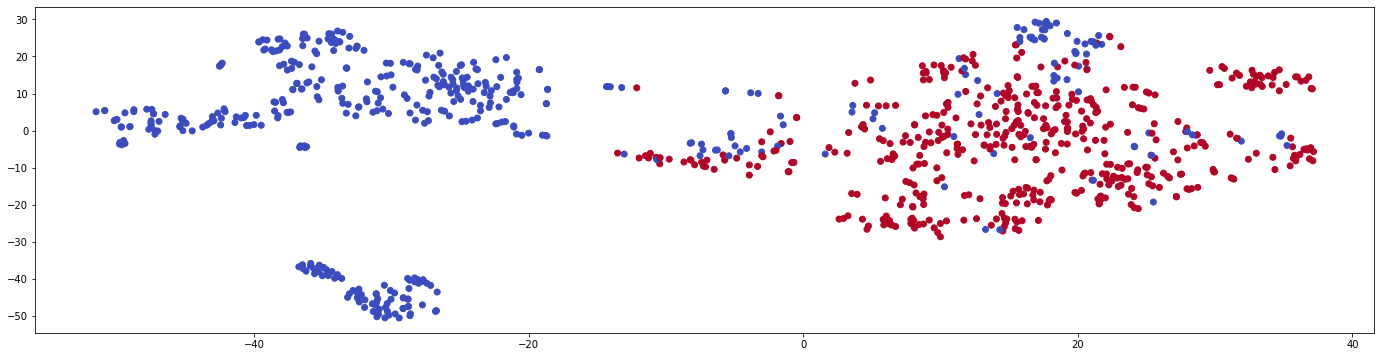

In [74]:
f,ax = plt.subplots(1,1,figsize=(24,6))
ax.scatter(X_down_tsne[:,0], X_down_tsne[:,1], c=(y_down==0), cmap='coolwarm')

plt.show()

undersampling with near miss
https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/

Typically, undersampling methods are used in conjunction with an oversampling technique for the minority class, and this combination often results in better performance.

The simplest undersampling technique involves randomly selecting examples from the majority class and deleting them from the training dataset. Like we did.

NearMiss-1: Majority class examples with minimum average distance to three closest minority class examples.

NearMiss-2: Majority class examples with minimum average distance to three furthest minority class examples.

NearMiss-3: Majority class examples with minimum distance to each minority class example.

In [1]:
from imblearn.under_sampling import NearMiss

In [7]:
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

In [8]:
X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [10]:
from collections import Counter
Counter(y_nearmiss)

Counter({0: 492, 1: 492})

In [16]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

In [17]:
log_reg_pred = cross_val_predict(log_reg, X_nearmiss, y_nearmiss, cv=5, method='decision_function')

In [19]:
roc_auc_score(y_nearmiss, log_reg_pred)

0.969260195650737

In [22]:
log_fpr, log_tpr, log_threshold = roc_curve(y_nearmiss, log_reg_pred)

SMOTE (over-sampling)

It generates samples by choosing the points between the closest neighbors of the minority class

In [ ]:
cross-valid data need to be generated before over-sampling